In [1]:
import numpy
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, "../figures/")

import readTFevents

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

In [2]:
file_name_TEResNet_lambda_p_0_000_dev   = "/home/manlong/IPython_Notebook/TEGAN/long_new_lambda_p_0_000/TEResNet/summary_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.000/dev/events.out.tfevents.1620008451.deagle"
file_name_TEResNet_lambda_p_0_000_train = "/home/manlong/IPython_Notebook/TEGAN/long_new_lambda_p_0_000/TEResNet/summary_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.000/train/events.out.tfevents.1620008449.deagle"

file_name_TEResNet_lambda_p_0_250_con_0_5_dev   = "/home/manlong/IPython_Notebook/TEGAN/long_new_lambda_p_0_250/TEResNet/summary_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.250/dev/events.out.tfevents.1620069407.deagle"
file_name_TEResNet_lambda_p_0_250_con_0_5_train = "/home/manlong/IPython_Notebook/TEGAN/long_new_lambda_p_0_250/TEResNet/summary_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.250/train/events.out.tfevents.1620069405.deagle"

file_name_TEResNet_lambda_p_0_250_con_0_9_dev   = "/home/manlong/IPython_Notebook/TEGAN/long_new_lambda_p_0_250_con_0_9/TEResNet/summary_RB12_LR0.0001_ENS0.2_CON0.9_PHY0.250/dev/events.out.tfevents.1621225612.deagle"
file_name_TEResNet_lambda_p_0_250_con_0_9_train = "/home/manlong/IPython_Notebook/TEGAN/long_new_lambda_p_0_250_con_0_9/TEResNet/summary_RB12_LR0.0001_ENS0.2_CON0.9_PHY0.250/train/events.out.tfevents.1621225610.deagle"


TEResNet_tags = readTFevents.get_tags_from_event(file_name_TEResNet_lambda_p_0_250_con_0_5_dev)


In [3]:
TEResNet_tags


['High_resolution/image/0',
 'Low_resolution/image/0',
 'Generated/image/0',
 'Concat/image/0',
 'Generator_loss',
 'Content_loss',
 'Physics_loss',
 'MSE_error',
 'Continuity_error',
 'Pressure_error',
 'TKE_error',
 'Enstrophy_error',
 'Z_-_Continuity_residual/image/0',
 'Z_-_Pressure_residual/image/0',
 'Learning_rate']

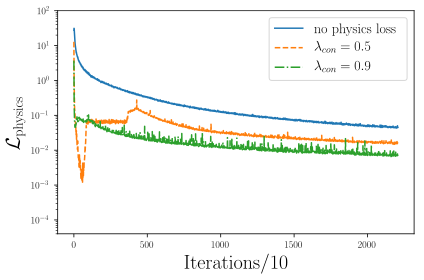

In [4]:
TEResNet_physics_loss_labmda_p_0_000_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_dev, tag='Physics_loss')
TEResNet_physics_loss_labmda_p_0_000_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_train, tag='Physics_loss')

TEResNet_physics_loss_lambda_p_0_250_con_0_5_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_dev, tag='Physics_loss')
TEResNet_physics_loss_lambda_p_0_250_con_0_5_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_train, tag='Physics_loss')

TEResNet_physics_loss_lambda_p_0_250_con_0_9_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_dev, tag='Physics_loss')
TEResNet_physics_loss_lambda_p_0_250_con_0_9_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_train, tag='Physics_loss')

plt.figure(figsize=(6,4))
plt.semilogy(TEResNet_physics_loss_labmda_p_0_000_train,         '-',  label=r'$\mathrm{no\ physics\ loss}$')
plt.semilogy(TEResNet_physics_loss_lambda_p_0_250_con_0_5_train, '--',  label=r'$\lambda_{con}=0.5$')
plt.semilogy(TEResNet_physics_loss_lambda_p_0_250_con_0_9_train, '-.', label=r'$\lambda_{con}=0.9$')

plt.xlabel(r'$\mathrm{Iterations/10}$', fontsize=20)
plt.ylabel(r'$\mathcal{L}_\mathrm{physics}$', fontsize=20)
plt.legend(fontsize=14)
plt.ylim(4.0e-5, 1.0e2)

plt.tight_layout()
# plt.savefig('TEResNet_physics_loss.pdf')
plt.show()



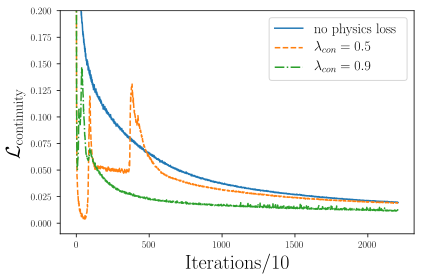

In [5]:
TEResNet_continuity_loss_labmda_p_0_000_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_dev, tag='Continuity_error')
TEResNet_continuity_loss_labmda_p_0_000_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_train, tag='Continuity_error')

TEResNet_continuity_loss_lambda_p_0_250_con_0_5_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_dev, tag='Continuity_error')
TEResNet_continuity_loss_lambda_p_0_250_con_0_5_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_train, tag='Continuity_error')

TEResNet_continuity_loss_lambda_p_0_250_con_0_9_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_dev, tag='Continuity_error')
TEResNet_continuity_loss_lambda_p_0_250_con_0_9_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_train, tag='Continuity_error')

plt.figure(figsize=(6,4))
plt.plot(TEResNet_continuity_loss_labmda_p_0_000_train,         '-',  label=r'$\mathrm{no\ physics\ loss}$')
plt.plot(TEResNet_continuity_loss_lambda_p_0_250_con_0_5_train, '--',  label=r'$\lambda_{con}=0.5$')
plt.plot(TEResNet_continuity_loss_lambda_p_0_250_con_0_9_train, '-.', label=r'$\lambda_{con}=0.9$')

plt.xlabel(r'$\mathrm{Iterations/10}$', fontsize=20)
plt.ylabel(r'$\mathcal{L}_\mathrm{continuity}$', fontsize=20)
plt.legend(fontsize=14)
plt.ylim(-0.01, 0.2)

plt.tight_layout()
# plt.savefig('TEResNet_continuity_loss.pdf')
plt.show()


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


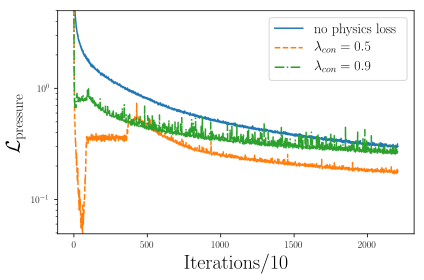

In [6]:
TEResNet_pressure_loss_labmda_p_0_000_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_dev, tag='Pressure_error')
TEResNet_pressure_loss_labmda_p_0_000_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_train, tag='Pressure_error')

TEResNet_pressure_loss_lambda_p_0_250_con_0_5_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_dev, tag='Pressure_error')
TEResNet_pressure_loss_lambda_p_0_250_con_0_5_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_train, tag='Pressure_error')

TEResNet_pressure_loss_lambda_p_0_250_con_0_9_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_dev, tag='Pressure_error')
TEResNet_pressure_loss_lambda_p_0_250_con_0_9_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_train, tag='Pressure_error')

plt.figure(figsize=(6,4))
plt.semilogy(TEResNet_pressure_loss_labmda_p_0_000_train,         '-',  label=r'$\mathrm{no\ physics\ loss}$')
plt.semilogy(TEResNet_pressure_loss_lambda_p_0_250_con_0_5_train, '--',  label=r'$\lambda_{con}=0.5$')
plt.semilogy(TEResNet_pressure_loss_lambda_p_0_250_con_0_9_train, '-.', label=r'$\lambda_{con}=0.9$')

plt.xlabel(r'$\mathrm{Iterations/10}$', fontsize=20)
plt.ylabel(r'$\mathcal{L}_\mathrm{pressure}$', fontsize=20)
plt.legend(fontsize=14)
plt.ylim(-0.1, 2.0)

plt.tight_layout()
# plt.savefig('TEResNet_pressure_loss.pdf')
plt.show()


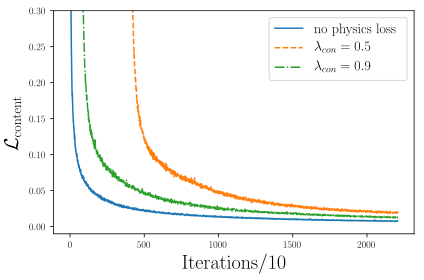

In [8]:
TEResNet_content_loss_labmda_p_0_000_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_dev, tag='Content_loss')
TEResNet_content_loss_labmda_p_0_000_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_000_train, tag='Content_loss')

TEResNet_content_loss_lambda_p_0_250_con_0_5_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_dev, tag='Content_loss')
TEResNet_content_loss_lambda_p_0_250_con_0_5_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_5_train, tag='Content_loss')

TEResNet_content_loss_lambda_p_0_250_con_0_9_dev   = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_dev, tag='Content_loss')
TEResNet_content_loss_lambda_p_0_250_con_0_9_train = readTFevents.read_summary_value(file_name_TEResNet_lambda_p_0_250_con_0_9_train, tag='Content_loss')

plt.figure(figsize=(6,4))
plt.plot(TEResNet_content_loss_labmda_p_0_000_train,         '-',  label=r'$\mathrm{no\ physics\ loss}$')
plt.plot(TEResNet_content_loss_lambda_p_0_250_con_0_5_train, '--',  label=r'$\lambda_{con}=0.5$')
plt.plot(TEResNet_content_loss_lambda_p_0_250_con_0_9_train, '-.', label=r'$\lambda_{con}=0.9$')

plt.xlabel(r'$\mathrm{Iterations/10}$', fontsize=20)
plt.ylabel(r'$\mathcal{L}_\mathrm{content}$', fontsize=20)
plt.legend(fontsize=14)
plt.ylim(-0.01, 0.3)

plt.tight_layout()
# plt.savefig('TEResNet_content_loss.pdf')
plt.show()
